### 2 変数間の記述統計
#### 共分散（covariance） ２変数間の相関関係を表す指標

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [3]:
np.cov([1,2,3],[-4,5,16], bias=True)

array([[ 0.66666667,  6.66666667],
       [ 6.66666667, 66.88888889]])

In [4]:
np.cov(df['total_bill'], df['tip'], bias=True)

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

In [5]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)
np.cov(x, bias=True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

In [6]:
# 不偏分散の表示
df.cov()

,total_bill,tip,size,tip_rate
total_bill,79.252939,8.323502,5.065983,-0.184107
tip,8.323502,1.914455,0.643906,0.028931
size,5.065983,0.643906,0.904591,-0.008298
tip_rate,-0.184107,0.028931,-0.008298,0.003730


#### 相関係数(correlation coefficient)

In [7]:
np.corrcoef([1,2,3],[-11,5,3])

array([[1.        , 0.80295507],
       [0.80295507, 1.        ]])

In [8]:
np.corrcoef(df['total_bill'], df['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [9]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)
np.corrcoef(x)

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

In [10]:
df.corr()

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


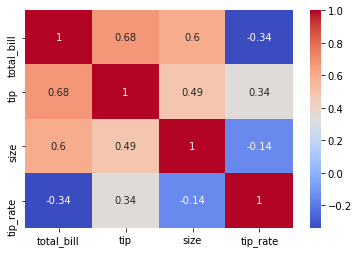

In [11]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

#### 連関（association）

In [12]:
# 分割表
pd.crosstab(df['sex'], df['time'])

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


In [13]:
# カイ二乗と期待値
x = pd.crosstab(df['sex'], df['time'])
stats.chi2_contingency(x, correction=False)

(10.277251918677742,
 0.0013468039268008766,
 1,
 array([[ 43.75409836, 113.24590164],
        [ 24.24590164,  62.75409836]]))

In [14]:
# カイ二乗
y = stats.chi2_contingency(x, correction=False)
print(y[0])
# 期待度数
print(y[3])

10.277251918677742
[[ 43.75409836 113.24590164]
 [ 24.24590164  62.75409836]]


#### クラメールの連関係数

In [15]:
def cramers_v(x, y):
    cont_table = pd.crosstab(df['sex'], df['time'])
    chi2 = stats.chi2_contingency(cont_table, correction=False)[0]
    min_d = min(cont_table.shape) - 1
    n = len(x)
    v = np.sqrt(chi2/(min_d*n))
    return v

In [16]:
cramers_v(df['sex'], df['time'])

0.20523129613344476